# The Equation of Time

Did you know that if you measure the time with a clock and a sundial you'd get two different results? This is because a sundial measures where the sun _really_ is in the sky, whereas the time reported by a clock is "mean time" which effectively measures where a fictitious "average sun" is. The reason for doing this is to make calculation of time simpler, and more uniform.

The mean and real positions of the sun differ for a number of reasons, and the difference is called the Equation of Time. The best way to discover the difference, say between real midday and mean midday on a given date, is to measure it. But if you want to know for a date in the future, then your only option is to model the Equation of Time numerically.

As mentioned, there are a few contributions to the Equation of Time. Just two can be considered to get a reasonable approximation of the difference between solar and mean time. They are:

 - The _eccentricity_ of the Earth's orbit. The Earth follows a (near-)elliptical path around the Sun, which means that the speed of the true Sun through the sky is sometimes faster, sometimes slower, than the mean Sun.
 - The _obliquity_ of the orbit, or the axial tilt of the Earth with respect to its orbital plane.

The remaining ones, including _procession_ (the Earth's axis is slowly rotating with respect to the plane of its orbit) and _nutation_ (the Earth's axis is wobbling), all make very small contributions to the Equation of Time.

Following some calculations that can be seen e.g. [on Wikipedia](https://en.wikipedia.org/wiki/Equation_of_time#Calculating_the_equation_of_time) or in the book [3D Astronomy with Java](https://www.willbell.com/math/3DAstro.html), you end up with this calculation for the Equation of Time.

In [7]:
import math

def equation_of_time(days_since_perihelion, anomalistic_year_length, e, epsilon, periapsisLongitude):
    y = math.tan(epsilon/2)**2 # where epsilon is the obliquity, in radians
    M = days_since_perihelion * 2 * math.pi / anomalistic_year_length # M is the mean anomaly
    obliquity_correction = y * math.sin(2*(M + periapsisLongitude))
    eccentricity_correction = -2.0 * e * math.sin(M) # e is the eccentricity
    difference = obliquity_correction + eccentricity_correction
    # the difference is currently in radians, convert into minutes
    difference = difference * 24 * 60 / (2 * math.pi)
    return difference

Using this implementation of the equation of time, you can plot the equation over a year between successive perihelia (closest approaches of the Earth to the Sun).

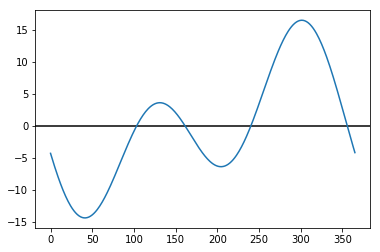

In [10]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

days = range(366)
corrections = [equation_of_time(d, 365.2596358, 0.016709, 0.409093, 4.938201) for d in days]
plt.axhline(0, color='black')
plt.plot(days, corrections)

Where the Equation of Time is above the line, a sundial would run "fast" compared to a clock showing mean time. Where it's below the line, a sundial would run "slow" compared to a mean time clock.

All of this astronomy is fine, but the point of this exercise is for you to refactor the `equation_of_time` function. This is more aesthetics than logic, so there's no "correct" way to do it. Things to look out for:

 - could variables be renamed, or functions extracted, to make the function's behaviour clearer?
 - are there inconsistent stylistic choices that could be brought into accordance?
 - is every parameter necessary, or could some of them be constants? Is every constant actually constant, or should some be parameters?
 - are there any data structures, classes, or other abstractions you could introduce to improve the code?

Additionally, not everybody knows where the Earth is in its orbit, so maybe "days since perihelion" isn't a good parameter if you want the function to be usable. With the knowledge that there was a perihelion at 3 January 2019 05:19 UTC, and use of Python's [datetime](https://docs.python.org/3.5/library/datetime.html) module, could you make an easier-to-use function? (Also, is this "refactoring", where that's defined as altering the code without changing the behaviour?)

Finally, timekeeping on Mars is a challenge. The Martian "Sol" or day is about the same length as an Earth day, but its anomalous year is 668.5991 Sols long. Its orbital eccentricity ($e$) is 0.0934, and its obliquity $\epsilon$ is 0.439648 radians. If your "customer" were NASA, who needed to calculate the equation of time for Earth, Mars, and other planets, would you choose to use different abstractions to represent the components of the equation?